<a href="https://colab.research.google.com/github/ubsuny/MLFringe-Contrast-CP2P2024/blob/main/contrast_two_slit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fit Parameters:
  A (offset intensity): 0.6191395513426811 +/- 0.022229601949233044
  B (amplitude): 0.3984618293016465 +/- 0.029272139922351805
  P_M (P_M): 0.0005571982405314163 +/- 1.24155778405564e-05
  phi0 (phi0): 0.07033847680049757 +/- 0.15593054276763987
V (B/A): 0.643573534330883 +/- 0.05262325993069495
d : 0.014


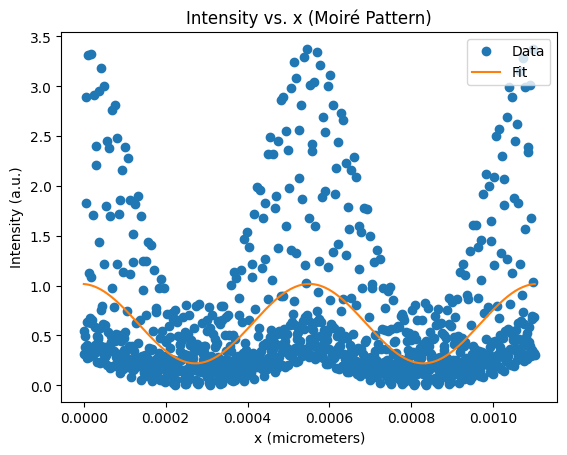

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Parameters
pi = np.pi
p_G = 2.4E-6
L_1 = 1.2
L_2 = 2  # Fix z to L_2
d = 0.014
L = L_1 + d + L_2
C1 = np.cos(pi / 4)
C2 = np.cos(pi / 4)
S1 = np.sin(pi / 4)
S2 = np.sin(pi / 4)
M1 = 1 + d / L_1
lam = 4.4E-10

# Some equations def.
k_G = 2 * pi / p_G
K_0 = 2 * pi / lam
x_1 = 0
x_2 = 0

# Moiré period estimation
P_M = L * p_G / d

# Range for x (considering micrometers)
x_values = np.linspace(0, 2 * P_M, 1000)

# Initialize a 1D intensity array
intensity_values = np.zeros_like(x_values)

# Calculate intensity for each x value (z fixed at L_2)
for j, x in enumerate(x_values):
    M2 = 1 + L_2 / (L_1 + d)  # Calculate M2 with z = L_2

    sum1 = sum(
        2 / (pi * n) * np.exp(1j * n * k_G * (x / M2 - x_2)) * np.exp(-1j * (n**2 * k_G**2 * L_2) / (2 * K_0 * M2))
        for n in [-1, 1]
    )
    sum2 = sum(
        2 / (pi * m) * np.exp(1j * m**2 * k_G**2 * d) / (2 * K_0 * M1)
        * np.exp(1j * m * k_G * x / (M1 * M2))
        * np.exp((-1j * m**2 * k_G**2 * L_2) / (2 * K_0 * M1**2 * M2**2))
        for m in [-1, 1]
    )
    sum3 = sum(
        4 / (pi**2 * m * n) * np.exp((1j * m**2 * k_G**2 * d) / (2 * K_0 * M1))
        * np.exp(-1j * n * k_G * x_2)
        * np.exp(1j * ((m * k_G / M1) + (n * k_G)) * (x / M2))
        * np.exp((-1j * (m / M1 + n)**2 * k_G**2 * L_2) / (2 * M2 * K_0))
        for m in [-1, 1]
        for n in [-1, 1]
    )

    # Calculate intensity for the given x value
    intensity_values[j] = np.abs((C1 * C2) + (C1 * S2) * sum1 + (S1 * C2) * sum2 + (S1 * S2) * sum3)**2

# Define fitting function for intensity (including phi0)
def intensity_func(x, A, B, P_M, phi0):
    return A + B * np.cos(2*np.pi*x/P_M + phi0)

# **Limit pM range (adjust bounds as needed)**
# A, B has lower limit 0 and goes till 1, PM limit is around moire, so, 0.8*PM-1.2*PM and phase is, -/pi to +pi
bounds = ([0, 0, 0.8 * P_M, -np.pi/2], [1, 1, 1.2 * P_M, np.pi/2])
# Perform the fit
popt, pcov = curve_fit(intensity_func, x_values, intensity_values, bounds=bounds)

# Extract fit parameters
A, B, P_M, phi0 = popt
# Calculate the ratio V = B / A
V = B / A

# Extract standard deviations from the covariance matrix
perr = np.sqrt(np.diag(pcov))

# Extract uncertainties for A and B
A_err, B_err, P_M_err, phi0_err = perr

# Propagate uncertainties to calculate V uncertainty
V_err = V * np.sqrt((B_err / B)**2 + (A_err / A)**2)

# Print fit parameters for analysis
print("Fit Parameters:")
print("  A (offset intensity):", A, "+/-", A_err)
print("  B (amplitude):", B, "+/-", B_err)
print("  P_M (P_M):", P_M, "+/-", P_M_err)
print("  phi0 (phi0):", phi0, "+/-", phi0_err)
# Print the value of V
print("V (B/A):", V, "+/-", V_err)
print("d :", d)

# Plot the fit
plt.plot(x_values, intensity_values, 'o', label='Data')  # Plot data points
plt.plot(x_values, intensity_func(x_values, *popt), label='Fit')  # Plot the fitted curve using optimal parameters

# Add labels and title
plt.xlabel('x (micrometers)')
plt.ylabel('Intensity (a.u.)')
plt.title('Intensity vs. x (Moiré Pattern)')

# Add legend
plt.legend()

# Show the plot
plt.show()


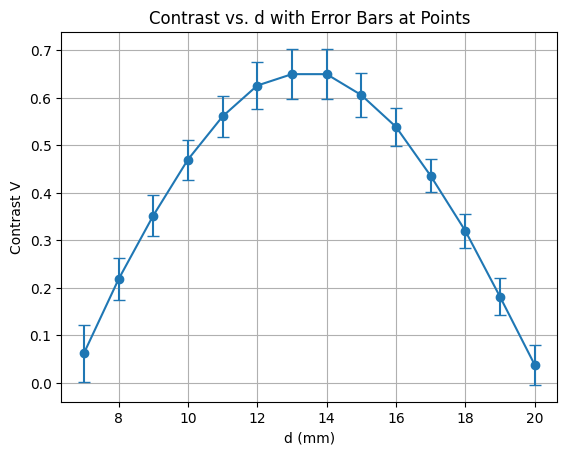

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the values of d (in mm) and contrast V
d_values_mm = [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]  # array of d values (in mm)
V_values = [0.062, 0.2181, 0.352, 0.47, 0.561, 0.626, 0.65, 0.65, 0.606, 0.539, 0.4359, 0.32, 0.1813, 0.038]  # Provide your array of contrast V values
V_errors = [0.06, 0.044, 0.043,0.0418,0.04392,0.0490,0.0531,0.0526,0.0469,0.0392,0.0346,0.0357,0.0393,0.04219]  # Actual uncertainties in contrast values

# Plot contrast V vs. d with error bars at the points
plt.errorbar(d_values_mm, V_values, yerr=V_errors, fmt='o', linestyle='-', capsize=4)
plt.xlabel('d (mm)')
plt.ylabel('Contrast V')
plt.title('Contrast vs. d with Error Bars at Points')
plt.grid(True)
plt.show()
